In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
# Load the CSV file into a DataFrame
df = pd.read_csv('AG18_APs.csv')

# Create the new column
new_column = pd.Series(range(-100, 2010, 10))

# Insert the new column at the beginning of the DataFrame
df.insert(0, 'NewColumn', new_column)

# Save the modified DataFrame back to a CSV file if needed
df.to_csv('AG18_APS_current.csv', index=False)

# Print the modified DataFrame to verify
print(df)

     NewColumn  AG18_A1_UT_01_0000.abf  AG18_A1_UT_02_0000.abf  \
0         -100                     0.0                     0.0   
1          -90                     0.0                     0.0   
2          -80                     0.0                     0.0   
3          -70                     0.0                     0.0   
4          -60                     0.0                     0.0   
..         ...                     ...                     ...   
195       1850                     NaN                     NaN   
196       1860                     NaN                     NaN   
197       1870                     NaN                     NaN   
198       1880                     NaN                     NaN   
199       1890                     NaN                     NaN   

     AG18_A1_UT_03_0000.abf  AG18_A1_UT_04_0000.abf  AG18_A1_UT_11_0000.abf  \
0                       0.0                     0.0                     0.0   
1                       0.0                     0

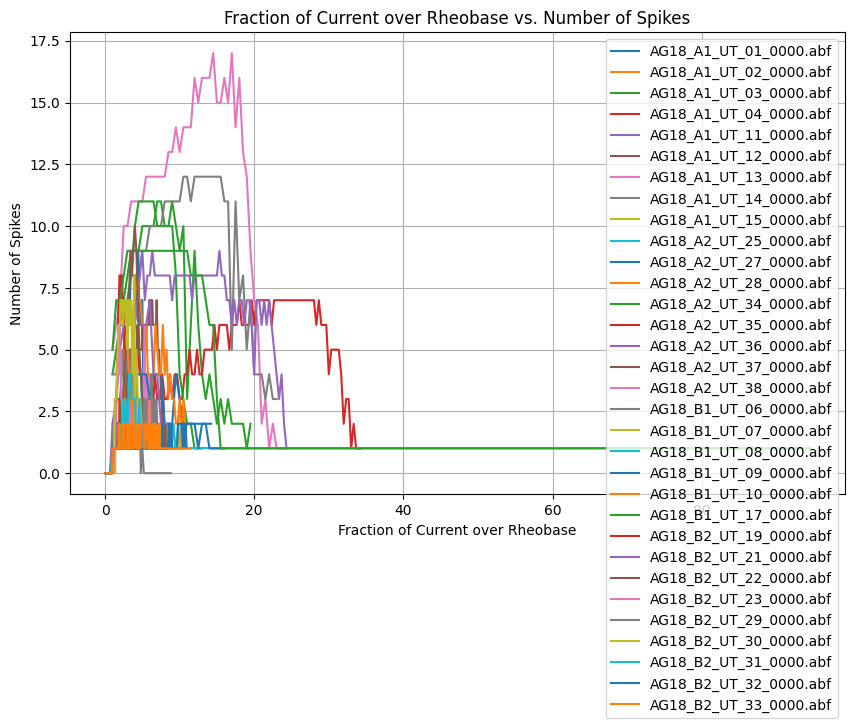

In [9]:
# Load the CSV file
df = pd.read_csv('AG18_APS_current.csv')


# Assume the first column is the current values
currents = df.iloc[:, 0]

# Filter out current values less than or equal to 10
df = df[currents > 10].reset_index(drop=True)
currents = df.iloc[:, 0]

# Prepare the plot
plt.figure(figsize=(10, 6))

# Loop over each column (skip the first column as it is current values)
for col in df.columns[1:]:
    # Find the index where the first spike occurs (rheobase)
    rheobase_index = df[col].gt(0).idxmax()
    rheobase_current = currents[rheobase_index]
    
    # Calculate the fraction of current over rheobase
    current_fraction = currents / rheobase_current
    
    # Plot the fraction of current over rheobase versus number of spikes
    plt.plot(current_fraction, df[col], label=col)

# Add labels and legend
plt.xlabel('Fraction of Current over Rheobase')
plt.ylabel('Number of Spikes')
plt.title('Fraction of Current over Rheobase vs. Number of Spikes')
plt.legend()
plt.grid(True)
plt.show()


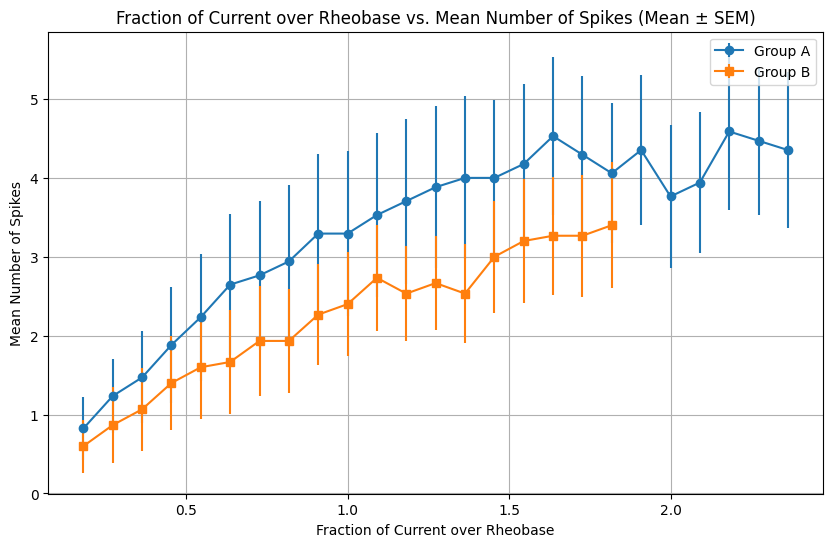

In [13]:

# Load the CSV file
df = pd.read_csv('AG18_APS_current.csv')

# Assume the first column is the current values
currents = df.iloc[:, 0]

# Filter out current values less than or equal to 10
df = df[currents > 10].reset_index(drop=True)
currents = df.iloc[:, 0]

# Create dictionaries to store data for groups A and B
data_groups = {'A': [], 'B': []}

# Loop over each column (skip the first column as it is current values)
for col in df.columns[1:]:
    if 'A1' in col or 'A2' in col:
        group = 'A'
    elif 'B1' in col or 'B2' in col:
        group = 'B'
    else:
        continue
    
    # Find the index where the first spike occurs (rheobase)
    rheobase_index = df[col].gt(0).idxmax()
    rheobase_current = currents[rheobase_index]
    
    # Calculate the fraction of current over rheobase
    current_fraction = currents / rheobase_current
    
    # Append the normalized data (current_fraction and spikes) to the appropriate group
    data_groups[group].append(df[col].values)

# Create a DataFrame to store the mean and SEM for each group
mean_sem_data = {'Fraction over Rheobase': currents / rheobase_current}

for group in data_groups:
    spikes_array = np.array(data_groups[group])
    
    # Calculate mean and SEM
    mean_spikes = np.mean(spikes_array, axis=0)
    sem_spikes = np.std(spikes_array, axis=0) / np.sqrt(spikes_array.shape[0])
    
    # Store the results in the DataFrame
    mean_sem_data[f'Mean Spikes {group}'] = mean_spikes
    mean_sem_data[f'SEM {group}'] = sem_spikes

mean_sem_df = pd.DataFrame(mean_sem_data)

# Plot the means with SEM as error bars
plt.figure(figsize=(10, 6))

plt.errorbar(mean_sem_df['Fraction over Rheobase'], mean_sem_df['Mean Spikes A'], yerr=mean_sem_df['SEM A'], label='Group A', fmt='-o')
plt.errorbar(mean_sem_df['Fraction over Rheobase'], mean_sem_df['Mean Spikes B'], yerr=mean_sem_df['SEM B'], label='Group B', fmt='-s')

# Add labels and legend
plt.xlabel('Fraction of Current over Rheobase')
plt.ylabel('Mean Number of Spikes')
plt.title('Fraction of Current over Rheobase vs. Mean Number of Spikes (Mean ± SEM)')
plt.legend()
plt.grid(True)
plt.show()


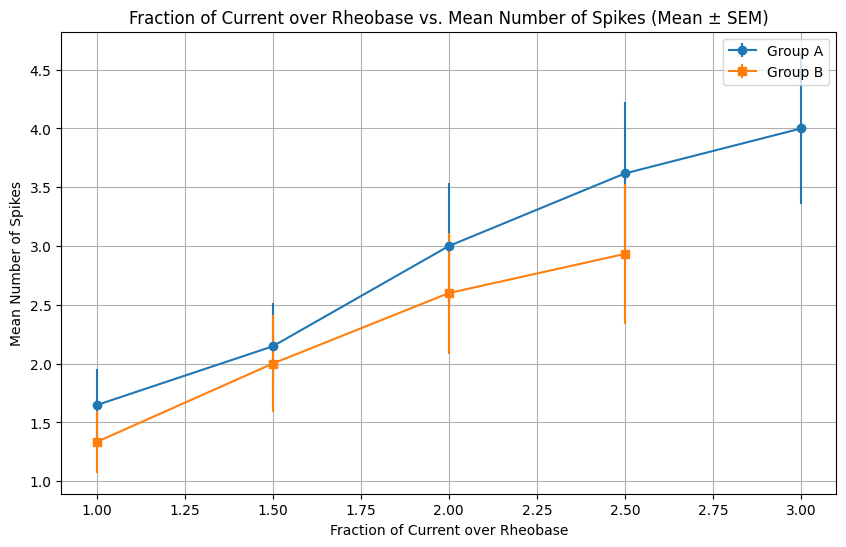

In [16]:
# Load the CSV file
df = pd.read_csv('AG18_APS_current.csv')

# Assume the first column is the current values
currents = df.iloc[:, 0]

# Assume the first column is the current values
currents = df.iloc[:, 0]

# Filter out current values less than or equal to 10
df = df[currents > 10].reset_index(drop=True)
currents = df.iloc[:, 0]

# Create dictionaries to store data for groups A and B
data_groups = {'A': [], 'B': []}

# Loop over each column (skip the first column as it is current values)
for col in df.columns[1:]:
    if 'A1' in col or 'A2' in col:
        group = 'A'
    elif 'B1' in col or 'B2' in col:
        group = 'B'
    else:
        continue
    
    # Find the index where the first spike occurs (rheobase)
    rheobase_index = df[col].gt(0).idxmax()
    rheobase_current = currents[rheobase_index]
    
    # Calculate the fraction of current over rheobase
    current_fraction = currents / rheobase_current
    
    # Append the normalized data (current_fraction and spikes) to the appropriate group
    data_groups[group].append((current_fraction, df[col].values))

# Interpolate and calculate means and SEMs
mean_sem_data = {'Fraction over Rheobase': np.linspace(1, currents.max() / currents.min(), num=len(currents))}

for group in data_groups:
    interpolated_spikes = []
    
    for current_fraction, spikes in data_groups[group]:
        # Interpolate spikes to common fractions
        interp_spikes = np.interp(mean_sem_data['Fraction over Rheobase'], current_fraction, spikes)
        interpolated_spikes.append(interp_spikes)
    
    interpolated_spikes_array = np.array(interpolated_spikes)
    
    # Calculate mean and SEM
    mean_spikes = np.mean(interpolated_spikes_array, axis=0)
    sem_spikes = np.std(interpolated_spikes_array, axis=0) / np.sqrt(interpolated_spikes_array.shape[0])
    
    # Store the results in the DataFrame
    mean_sem_data[f'Mean Spikes {group}'] = mean_spikes
    mean_sem_data[f'SEM {group}'] = sem_spikes

mean_sem_df = pd.DataFrame(mean_sem_data)

# Plot the means with SEM as error bars
plt.figure(figsize=(10, 6))

plt.errorbar(mean_sem_df['Fraction over Rheobase'], mean_sem_df['Mean Spikes A'], yerr=mean_sem_df['SEM A'], label='Group A', fmt='-o')
plt.errorbar(mean_sem_df['Fraction over Rheobase'], mean_sem_df['Mean Spikes B'], yerr=mean_sem_df['SEM B'], label='Group B', fmt='-s')

# Add labels and legend
plt.xlabel('Fraction of Current over Rheobase')
plt.ylabel('Mean Number of Spikes')
plt.title('Fraction of Current over Rheobase vs. Mean Number of Spikes (Mean ± SEM)')
plt.legend()
plt.grid(True)
plt.show()
